In [145]:
import pandas as pd
import numpy as np




In [146]:
acceso_internet_2017 = '../data/CSV_TICS/Acceso_internet_CCAA_2017.csv'

In [147]:
# VARIABLES TICS

In [148]:
TICS_2017 = pd.read_csv(acceso_internet_2017, sep =';')

# Guardar el archivo con formato 'csv utf-8 (delimitado por comas)' para que no den problemas las palabras acentuadas

In [149]:
# Pasar los diferentes tipos de conexión seleccionados a columnas
# 1. Creamos una lista con la columna de Comunidades autónomas y dejamos un solo valor de cada categoría. ordenamos la lista creada. Colocamos esta lista como indice y colocamos en primer lugar la última categoría que corresponde al 'Total nacional'. Borramos la que queda al final que es 'Total nacional'

comunidades_autonomas = TICS_2017["Comunidades y Ciudades Autónomas"].unique()
comunidades_autonomas_ordenada = sorted(list(comunidades_autonomas)) 
comunidades_autonomas_ordenada.insert(0, comunidades_autonomas_ordenada[-1])
comunidades_autonomas_ordenada.pop()

# 2. Creamos una lista que corresponde con los valores de la columna en la que aparecen los diferentes tipos de conexión. 
# 3. Creamos un diccionario cuyas claves seran los valores de Cada uno de los items de esta variable y recogerá los valores de la columna 2 del dataframe

tipo_conex = TICS_2017["Forma de conexión"].unique()
diccionario_final = {}
for conex in tipo_conex:
    diccionario_final[conex] = []
for row in TICS_2017.iterrows():
    comunidad = row[1][0]
    tipo_conex = row[1][1]
    valor = row[1][2]
    diccionario_final[tipo_conex].append(valor)
TICS_2017 = pd.DataFrame(diccionario_final, index=comunidades_autonomas_ordenada)



In [150]:
TO_TICS_2017 = ['Viviendas con conexión de banda ancha', 'Viviendas con conexión de banda estrecha', 'Conexión de banda estrecha por llamada telefónica a través de su línea de teléfono convencional (módem) o RDSI','Conexión móvil de banda estrecha (otros teléfonos móviles -GPRS-)']

TICS_2017.drop(TO_TICS_2017, inplace = True, axis=1)


In [151]:
# Renombramos los encabezados de las columnas 

TICS_2017 = TICS_2017.rename(columns = 
{'Total de viviendas que disponen de acceso a Internet y declaran las formas de conexión utilizadas': 'Declaran acceso_internet_2017', 
'Conexión de banda ancha por ADSL': 'ADSL', 
'Conexión de banda ancha por red de cable o fibra óptica': 'cable_fibra óptica',
'Otras conexiones fijas de banda ancha (vía satélite, WiFi público o WiMax)': 'otras conexiones', 
'Conexión móvil de banda ancha vía modem USB ó tarjeta (en portátiles, p.ej.)':'móvil_USB'})




In [152]:
# Renombrar la columna 4
TICS_2017.rename(columns={ TICS_2017.columns[4]: 'conexion móvil_dispositivo_mano' }, inplace = True)


In [153]:
TICS_2017 = TICS_2017.stack().str.replace(',','.').unstack()

In [154]:
TICS_2017[['ADSL', 'cable_fibra óptica','otras conexiones', 'conexion móvil_dispositivo_mano', 'móvil_USB']]= TICS_2017[['ADSL', 'cable_fibra óptica','otras conexiones', 'conexion móvil_dispositivo_mano', 'móvil_USB']].astype(float)


In [155]:
TICS_2017['Declaran acceso_internet_2017'] = TICS_2017['Declaran acceso_internet_2017'].apply(lambda x: x.split('.')).apply(''.join)


In [156]:
TICS_2017[['Declaran acceso_internet_2017']]= TICS_2017[['Declaran acceso_internet_2017']].astype(int)

In [157]:
TICS_2017 = TICS_2017.sort_index()

In [158]:
TICS_2017['index'] = TICS_2017.index

In [159]:
TICS_2017 = TICS_2017.reset_index(drop = True)

In [160]:
# VARIABLES DE SALUD FÍSICA Y MENTAL

In [161]:
# Comprobar que se pueden leer bien todos los archivos a unir

Concentrarse = pd.read_csv("../data/CSV_Salud/Concentrarse_2017.csv", index_col = [0], sep =';')
Diabetes = pd.read_csv("../data/CSV_Salud/Diabetes.csv", index_col = [0], sep =';')
Dificultades_ver = pd.read_csv("../data/CSV_Salud/Dificultades_ver_2017.csv", index_col = [0], sep =';')
Dolor_espalda = pd.read_csv("../data/CSV_Salud/Dolor_espalda_2017.csv", index_col = [0], sep =';')
Infarto_miocardio = pd.read_csv("../data/CSV_Salud/Infarto_miocardio_2017.csv", index_col = [0], sep =';')
Restricc_AVD_Dolor = pd.read_csv("../data/CSV_Salud/Restricc_AVD_Dolor.csv", index_col = [0], sep =';')
Masa_corporal = pd.read_csv("../data/CSV_Salud/Masa_corporal_2017.csv", index_col = [0], sep =';')
Migraña = pd.read_csv("../data/CSV_Salud/Migraña_2017.csv", index_col = [0], sep =';')
Problemas_salud_mental = pd.read_csv("../data/CSV_Salud/Problemas_salud_mental_2017.csv", index_col = [0], sep =';')
salud_mental = pd.read_csv("../data/CSV_Salud/salud_mental_2017.csv", index_col = [0], sep =';')
Salud_percibida = pd.read_csv("../data/CSV_Salud/Salud_percibida_2017.csv", index_col = [0], sep =';')
Tension_alta = pd.read_csv("../data/CSV_Salud/Tension_2017.csv", index_col = [0], sep =';')



In [162]:
Columnas = [0,3]
Concentrarse.drop(Concentrarse.columns[Columnas], inplace = True, axis =1)


In [163]:
Concentrarse.rename(columns={Concentrarse.columns[0]: "Alguna Dificultad Conc", Concentrarse.columns[1]: "Mucha Dificultad Conc" }, inplace = True)


In [164]:
# Pasar a float los valores de todas las columnas
Concentrarse = Concentrarse.stack().str.replace(',','.').unstack()


In [165]:
Concentrarse[['Alguna Dificultad Conc', 'Mucha Dificultad Conc']]= Concentrarse[['Alguna Dificultad Conc','Mucha Dificultad Conc']].astype(float)

In [166]:
Concentrarse = Concentrarse.sort_index()

In [167]:
Concentrarse['index'] = Concentrarse.index

In [168]:
Concentrarse = Concentrarse.reset_index(drop = True)

In [169]:
Diabetes = pd.read_csv("../data/CSV_Salud/Diabetes.csv", index_col = [0], sep =';')

In [170]:
Diabetes.rename(columns={ Diabetes.columns[0]: "Diabetes" }, inplace = True)


In [171]:

Diabetes = Diabetes.stack().str.replace(',','.').unstack()


In [172]:
Diabetes[['Diabetes']]= Diabetes[['Diabetes']].astype(float)

In [173]:
Diabetes = Diabetes.sort_index()

In [174]:
Diabetes['index'] = Diabetes.index

In [175]:
Diabetes = Diabetes.reset_index(drop = True)

In [176]:
Dificultades_ver.rename(columns={Dificultades_ver.columns[0]: "Alguna Dificultad Ver", Dificultades_ver.columns[1]: "Mucha Dificultad Ver" }, inplace = True)

In [177]:
Dificultades_ver = Dificultades_ver.stack().str.replace(',','.').unstack()


In [178]:
Dificultades_ver[['Alguna Dificultad Ver', 'Mucha Dificultad Ver']]= Dificultades_ver[['Alguna Dificultad Ver','Mucha Dificultad Ver']].astype(float)

In [179]:
Dificultades_ver = Dificultades_ver.sort_index()

In [180]:
Dificultades_ver['index'] = Dificultades_ver.index

In [181]:
Dificultades_ver = Dificultades_ver.reset_index(drop = True)

In [182]:
# borrar una fila
Dolor_espalda = Dolor_espalda.drop (Dolor_espalda.index[[0]])


In [183]:
# cambiar la coma por un punto para poder pasar a float el string

Dolor_espalda = Dolor_espalda.stack().str.replace(',','.').unstack()

In [184]:
# Pasar a float el string

Dolor_espalda[['Dolor espalda crónico cervical', 'Dolor espalda crónico lumbar']]= Dolor_espalda[['Dolor espalda crónico cervical','Dolor espalda crónico lumbar']].astype(float)

In [185]:
Dolor_espalda = Dolor_espalda.sort_index()

In [186]:
Dolor_espalda['index'] = Dolor_espalda.index

In [187]:
Dolor_espalda = Dolor_espalda.reset_index(drop = True)

In [188]:
Columnas = [1]
Infarto_miocardio.drop(Infarto_miocardio.columns[Columnas], inplace = True, axis =1)

In [189]:
Infarto_miocardio.rename(columns={Infarto_miocardio.columns[0]: "Infarto_miocardio" }, inplace = True)

In [190]:
Infarto_miocardio = Infarto_miocardio.stack().str.replace(',','.').unstack()

In [191]:
Infarto_miocardio[['Infarto_miocardio']]= Infarto_miocardio[['Infarto_miocardio']].astype(float)

In [192]:
Infarto_miocardio = Infarto_miocardio.sort_index()

In [193]:
Infarto_miocardio['index'] = Infarto_miocardio.index

In [194]:
Infarto_miocardio = Infarto_miocardio.reset_index(drop = True)

In [195]:
Columnas = [1]
Restricc_AVD_Dolor.drop(Restricc_AVD_Dolor.columns[Columnas], inplace = True, axis =1)

In [196]:
Restricc_AVD_Dolor.rename(columns={Restricc_AVD_Dolor.columns[0]: "Restricc_AVD_Dolor" }, inplace = True)

In [197]:
Restricc_AVD_Dolor = Restricc_AVD_Dolor.stack().str.replace(',','.').unstack()

In [198]:
Restricc_AVD_Dolor[['Restricc_AVD_Dolor']]= Restricc_AVD_Dolor[['Restricc_AVD_Dolor']].astype(float)

In [199]:
Restricc_AVD_Dolor = Restricc_AVD_Dolor.sort_index()

In [200]:
Restricc_AVD_Dolor['index'] = Restricc_AVD_Dolor.index

In [201]:
Restricc_AVD_Dolor = Restricc_AVD_Dolor.reset_index(drop = True)

In [202]:
Columnas = [0,1,3]
Masa_corporal.drop(Masa_corporal.columns[Columnas], inplace = True, axis =1)

In [203]:
Masa_corporal.rename(columns={Masa_corporal.columns[0]: "Sobrepeso" }, inplace = True)

In [204]:
Masa_corporal = Masa_corporal.stack().str.replace(',','.').unstack()

In [205]:
Masa_corporal[['Sobrepeso']]= Masa_corporal[['Sobrepeso']].astype(float)

In [206]:
Masa_corporal = Masa_corporal.sort_index()

In [207]:
Masa_corporal['index'] = Masa_corporal.index

In [208]:
Masa_corporal = Masa_corporal.reset_index(drop = True)

In [209]:
Migraña.rename(columns={ Migraña.columns[0]: "Migraña" }, inplace = True)

In [210]:
Migraña = Migraña.stack().str.replace(',','.').unstack()

In [211]:
Migraña[['Migraña']]= Migraña[['Migraña']].astype(float)

In [212]:
Migraña = Migraña.sort_index()

In [213]:
Migraña['index'] = Migraña.index

In [214]:
Migraña = Migraña.reset_index(drop = True)

In [215]:
Columnas = [1,3,5]
Problemas_salud_mental.drop(Problemas_salud_mental.columns[Columnas], inplace = True, axis =1)

In [216]:
Problemas_salud_mental.rename(columns={Problemas_salud_mental.columns[0]: "Depresión", Problemas_salud_mental.columns[1]: "Ansiedad" , Problemas_salud_mental.columns[2]: "Otros probl Salud_mental"}, inplace = True)

In [217]:
Problemas_salud_mental = Problemas_salud_mental.stack().str.replace(',','.').unstack()

In [218]:
Problemas_salud_mental[['Depresión', 'Ansiedad', 'Otros probl Salud_mental']]= Problemas_salud_mental[['Depresión', 'Ansiedad', 'Otros probl Salud_mental']].astype(float)

In [219]:
Problemas_salud_mental = Problemas_salud_mental.sort_index()

In [220]:
Problemas_salud_mental['index'] = Problemas_salud_mental.index

In [221]:
Problemas_salud_mental = Problemas_salud_mental.reset_index(drop = True)

In [222]:
Columnas = [1]
salud_mental.drop(salud_mental.columns[Columnas], inplace = True, axis =1)


In [223]:
salud_mental.rename(columns={salud_mental.columns[0]: "Salud_mental: Media"}, inplace = True)

In [224]:
salud_mental = salud_mental.stack().str.replace(',','.').unstack()

In [225]:
salud_mental[['Salud_mental: Media']]= salud_mental[['Salud_mental: Media']].astype(float)

In [226]:
salud_mental = salud_mental.sort_index()

In [227]:
salud_mental['index'] = salud_mental.index

In [228]:
salud_mental = salud_mental.reset_index(drop = True)

In [229]:
Columnas = [0,3,4]
Salud_percibida.drop(Salud_percibida .columns[Columnas], inplace = True, axis =1)

In [230]:
Salud_percibida.rename(columns={Salud_percibida.columns[0]: "Buena Salud", Salud_percibida.columns[1]: "Salud Regular"}, inplace = True)


In [231]:
Salud_percibida = Salud_percibida.stack().str.replace(',','.').unstack()

In [232]:
Salud_percibida[['Buena Salud']]= Salud_percibida[['Salud Regular']].astype(float)

In [233]:
Salud_percibida = Salud_percibida.sort_index()

In [234]:
Salud_percibida['index'] = Salud_percibida.index

In [235]:
Salud_percibida = Salud_percibida.reset_index(drop = True)

In [236]:
Tension_alta.rename(columns={Tension_alta.columns[0]: "Tension: alta"}, inplace = True)

In [237]:
Tension_alta = Tension_alta.stack().str.replace(',','.').unstack()

In [238]:
Tension_alta[['Tension: alta']]= Tension_alta[['Tension: alta']].astype(float)

In [239]:
Tension_alta = Tension_alta.sort_index()

In [240]:
Tension_alta['index'] = Tension_alta.index

In [241]:
Tension_alta = Tension_alta.reset_index(drop = True)

In [242]:
# VARIABLES DE CONTROL

In [243]:
Renta_hogar = pd.read_csv("../data/CSV_Control/Renta media_mediana_hogar_2018.csv", index_col = [0], sep =';')
Tasa_paro = pd.read_csv("../data/CSV_Control/Tasa_paro_2017.csv", index_col = [0], sep =';')
Indice_masculinidad = pd.read_csv("../data/CSV_Control/Sexo.csv", index_col = [0], sep =';')
Edad_25_59 = pd.read_csv("../data/CSV_Control/Edad_2018.csv", index_col = [0], sep =';')
Educacion_superior = pd.read_csv("../data/CSV_Control/Educacion_Superior_2017.csv", index_col = [0], sep =';')

In [244]:
Columnas = [1]
Renta_hogar.drop(Renta_hogar .columns[Columnas], inplace = True, axis =1)

In [245]:
Renta_hogar.rename(columns={Renta_hogar.columns[0]: "Renta_media_hogar"}, inplace = True)

In [246]:
Renta_hogar = Renta_hogar.sort_index()

In [247]:
Renta_hogar['index'] = Renta_hogar.index

In [248]:
Renta_hogar = Renta_hogar.reset_index(drop = True)

In [249]:
Tasa_paro.rename(columns={Tasa_paro.columns[0]: "Tasa_paro"}, inplace = True)

In [250]:
Tasa_paro = Tasa_paro.stack().str.replace(',','.').unstack()

In [251]:
Tasa_paro[['Tasa_paro']]= Tasa_paro[['Tasa_paro']].astype(float)

In [252]:
Tasa_paro = Tasa_paro.sort_index()

In [253]:
Tasa_paro['index'] = Tasa_paro.index

In [254]:
Tasa_paro = Tasa_paro.reset_index(drop = True)

In [255]:
Columnas = [0,1]
Indice_masculinidad.drop(Indice_masculinidad .columns[Columnas], inplace = True, axis =1)


In [256]:
Indice_masculinidad.rename(columns={Indice_masculinidad.columns[0]: "Índice_masculinidad"}, inplace = True)

In [257]:
Indice_masculinidad = Indice_masculinidad.stack().str.replace(',','.').unstack()

In [258]:
Indice_masculinidad[['Índice_masculinidad']]= Indice_masculinidad[['Índice_masculinidad']].astype(float)

In [259]:
Indice_masculinidad = Indice_masculinidad.sort_index()

In [260]:
Indice_masculinidad['index'] = Indice_masculinidad.index

In [261]:
Indice_masculinidad = Indice_masculinidad.reset_index(drop = True)

In [262]:
Columnas = [0,1]
Edad_25_59.drop(Edad_25_59.columns[Columnas], inplace = True, axis =1)


In [263]:
Edad_25_59.rename(columns={Edad_25_59.columns[0]: "Edad_25_59 años"}, inplace = True)

In [264]:
Edad_25_59 = Edad_25_59.stack().str.replace(',','.').unstack()

In [265]:
Edad_25_59[['Edad_25_59 años']]= Edad_25_59[['Edad_25_59 años']].astype(float)

In [266]:
Edad_25_59 = Edad_25_59.sort_index()

In [267]:
Edad_25_59['index'] = Edad_25_59.index

In [268]:
Edad_25_59 = Edad_25_59.reset_index(drop = True)

In [269]:
Educacion_superior.rename(columns={Educacion_superior.columns[0]: "Educacion_superior"}, inplace = True)

In [270]:
Educacion_superior = Educacion_superior.stack().str.replace(',','.').unstack()

In [271]:
Educacion_superior[['Educacion_superior']]= Educacion_superior[['Educacion_superior']].astype(float)

In [272]:
Educacion_superior = Educacion_superior.sort_index()

In [273]:
Educacion_superior['index'] = Educacion_superior.index

In [274]:
Educacion_superior = Educacion_superior.reset_index(drop = True)

In [275]:
del Concentrarse['index']
del Diabetes['index']
del Dificultades_ver['index']
del Dolor_espalda['index']
del Infarto_miocardio['index']
del Restricc_AVD_Dolor['index']
del Masa_corporal['index']
del Migraña['index']
del Problemas_salud_mental['index']
del salud_mental['index']
del Salud_percibida['index']
del Tension_alta['index']




In [276]:
del Renta_hogar['index']
del Tasa_paro['index']
del Indice_masculinidad['index']
del Edad_25_59['index']
del Educacion_superior['index']



In [277]:
Base_completa = pd.concat([TICS_2017, Concentrarse, Diabetes, Dificultades_ver, Dolor_espalda, Infarto_miocardio, Restricc_AVD_Dolor, Masa_corporal, Migraña, Problemas_salud_mental, salud_mental,Salud_percibida, Tension_alta, Renta_hogar, Tasa_paro, Indice_masculinidad, Edad_25_59, Educacion_superior], axis=1)

In [278]:
Base_completa.shape

(20, 30)

In [146]:
Base_completa.to_csv('Base_completa.csv')

In [138]:
# Base TICS_salud física
TICS_Control = Base_completa.drop(columns=['Alguna Dificultad Conc', 'Mucha Dificultad Conc', 'Diabetes','Alguna Dificultad Ver', 'Mucha Dificultad Ver', 'Dolor espalda crónico cervical', 'Dolor espalda crónico lumbar', 'Infarto_miocardio', 'Restricc_AVD_Dolor', 'Sobrepeso', 'Migraña', 'Depresión', 'Ansiedad', 'Otros probl Salud_mental', 'Salud_mental: Media', 'Buena Salud', 'Salud Regular', 'Tension: alta'], axis=1)


In [139]:
TICS_Control.to_csv('TICS_Control.csv')

In [140]:
# Base TICS_Salud_Física
TICS_Salud_Física = Base_completa.drop(columns=['Depresión', 'Ansiedad', 'Otros probl Salud_mental', 'Salud_mental: Media','Buena Salud', 'Salud Regular','Renta_media_hogar', 'Tasa_paro', 'Índice_masculinidad', 'Edad_25_59 años', 'Educacion_superior'], axis=1)

In [141]:
TICS_Salud_Física.to_csv('TICS_Salud_Física.csv')

In [142]:
# Base TICS_Salud_Mental

TICS_Salud_Mental = Base_completa.drop(columns=['Alguna Dificultad Conc', 'Mucha Dificultad Conc', 'Diabetes','Alguna Dificultad Ver', 'Mucha Dificultad Ver', 'Dolor espalda crónico cervical', 'Dolor espalda crónico lumbar', 'Infarto_miocardio', 'Restricc_AVD_Dolor', 'Sobrepeso', 'Migraña', 'Buena Salud', 'Salud Regular', 'Tension: alta', 'Renta_media_hogar', 'Tasa_paro', 'Índice_masculinidad', 'Edad_25_59 años', 'Educacion_superior'], axis=1)

In [143]:
TICS_Salud_Mental.to_csv('TICS_Salud_Mental.csv')

In [144]:
# Base TICS_Salud_Percibida

TICS_Salud_Percibida = Base_completa.drop(columns =['Alguna Dificultad Conc', 'Mucha Dificultad Conc', 'Diabetes',
       'Alguna Dificultad Ver', 'Mucha Dificultad Ver',
       'Dolor espalda crónico cervical', 'Dolor espalda crónico lumbar',
       'Infarto_miocardio', 'Restricc_AVD_Dolor', 'Sobrepeso', 'Migraña',
       'Depresión', 'Ansiedad', 'Otros probl Salud_mental',
       'Salud_mental: Media', 'Tension: alta',
       'Renta_media_hogar', 'Tasa_paro', 'Índice_masculinidad',
       'Edad_25_59 años', 'Educacion_superior'])

In [145]:
TICS_Salud_Percibida.to_csv('TICS_Salud_Percibida.csv')

In [ ]:
Base_completa = pd.concat([TICS_2017, Concentrarse, Diabetes, Dificultades_ver, Dolor_espalda, Infarto_miocardio, Restricc_AVD_Dolor, Masa_corporal, Migraña, Problemas_salud_mental, salud_mental,Salud_percibida, Tension_alta, Renta_hogar, Tasa_paro, Indice_masculinidad, Edad_25_59, Educacion_superior], axis=1)

In [283]:
Base_completa.columns

Index(['Declaran acceso_internet_2017', 'ADSL', 'cable_fibra óptica',
       'otras conexiones', 'conexion móvil_dispositivo_mano', 'móvil_USB',
       'index', 'Alguna Dificultad Conc', 'Mucha Dificultad Conc', 'Diabetes',
       'Alguna Dificultad Ver', 'Mucha Dificultad Ver',
       'Dolor espalda crónico cervical', 'Dolor espalda crónico lumbar',
       'Infarto_miocardio', 'Restricc_AVD_Dolor', 'Sobrepeso', 'Migraña',
       'Depresión', 'Ansiedad', 'Otros probl Salud_mental',
       'Salud_mental: Media', 'Buena Salud', 'Salud Regular', 'Tension: alta',
       'Renta_media_hogar', 'Tasa_paro', 'Índice_masculinidad',
       'Edad_25_59 años', 'Educacion_superior'],
      dtype='object')

In [286]:
import matplotlib.pyplot as plt

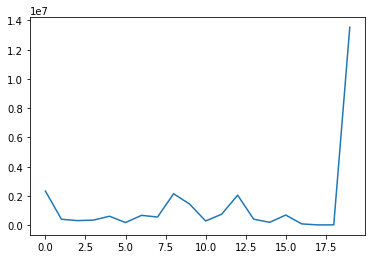

In [289]:
Base_completa['Declaran acceso_internet_2017'].plot()
plt.savefig("../reports/Declaran acceso_internet_2017.jpg", bbox_inches='tight')

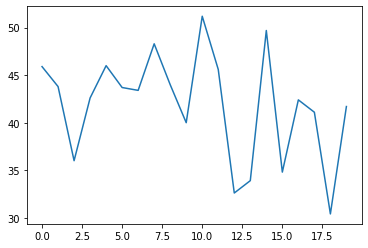

In [290]:
Base_completa['ADSL'].plot()
plt.savefig("../reports/ADSL.jpg", bbox_inches='tight')

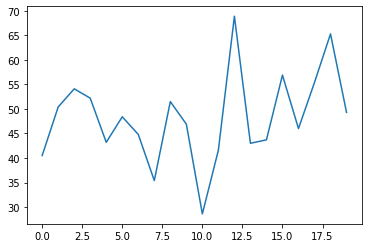

In [291]:
Base_completa['cable_fibra óptica'].plot()
plt.savefig("../reports/cable_fibra óptica.jpg", bbox_inches='tight')